In [6]:
import sys
sys.path.append("../../galaxy_computer_vision_with_EFIGI_data")

In [9]:
import pandas as pd
feature_data = pd.read_csv("../datasets/EFIGI_SIFT_feature_data.csv")


In [19]:
num_sift_features = 256
sift_labels = ["SIFT_" + str(i) for i in range(num_sift_features)]
feature_data[sift_labels]

KeyError: 'SIFT_256'

In [2]:
import cv2
image = cv2.imread(r"C:\Users\dpale\Desktop\Projects\galaxy_computer_vision_with_EFIGI_data\threshold_image\PGC0071926.png")

sift = cv2.SIFT_create(2)
kp, descriptions = sift.detectAndCompute(image, None)

In [8]:
kp

[]

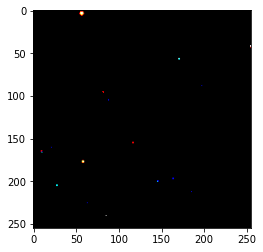

In [6]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [25]:
import pandas as pd
label_dataframe = pd.read_csv(r"C:\Users\dpale\Desktop\Projects\galaxy_computer_vision_with_EFIGI_data\datasets\EFIGI_labels.csv")
label_dataframe[label_dataframe["PGCname"] == "PGC0000212"]["category_label_names"][0]
label_dataframe.loc[label_dataframe["PGCname"] == "PGC0000212", "category_label_names"][0]

'spiral'

In [32]:
label_dataframe.iloc[0]["PGCname"]

'PGC0000212'

In [43]:
list(label_dataframe.loc[[1,2,3],"category_label_names"])

['spiral', 'lenticular', 'spiral']

In [3]:
import pickle
with open("../model_data/cnn_eval.p", "rb") as f:
    eval_data = pickle.load(f)

In [19]:
for key, value in eval_data.items():
    print(key)

epoch_acc
epoch_loss
predicted_labels
prediction_probabilities
ground_truth_labels


In [112]:
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np
def get_metrics_by_epoch(y_pred_epochs, y_true_epochs):

    # Get number of labels and number of epochjs
    num_labels = np.unique(y_pred_epochs).shape[0]
    num_epochs = len(y_pred_epochs)

    # Initialize the metric dictionary
    metric_dict = {
        "epoch_precisions": [],
        "epoch_recalls": [],
        "epoch_f1": []
    }

    # Fill up the metric dictionary.
    # Each metric is a 2d array,
    # where the first dimension is the label
    # and the second is the epoch.
    # Each value represents a metric for the label at that epoch.
    for label_index in range(num_labels):
        metric_dict["epoch_precisions"].append([])
        metric_dict["epoch_recalls"].append([])
        metric_dict["epoch_f1"].append([])

        for epoch_index in range(num_epochs):
            y_pred = y_pred_epochs[epoch_index]
            y_true = y_true_epochs[epoch_index]
            epoch_confusion_matrix = multilabel_confusion_matrix(y_pred, y_true)

            # F1 Scores
            f1s = []

            recalls = []
            # Gather true positives, false positives, false negatives, true negatives
            # (tp, fp, fn, tn)
            tp = epoch_confusion_matrix[label_index][1][1]
            fp = epoch_confusion_matrix[label_index][0][1]
            fn = epoch_confusion_matrix[label_index][1][0]
            tn = epoch_confusion_matrix[label_index][0][0]
            
            
            # Use them to derive precisions, recalls, accuracies per class
            f1 = (tp / (tp + tn + fn + tn))
            recall = tp / (tp + fn)
            precision = tp / (tp + fp)
            metric_dict["epoch_precisions"][label_index].append(precision)
            metric_dict["epoch_recalls"][label_index].append(recall)
            metric_dict["epoch_f1"][label_index].append(f1)
    return metric_dict
        

epoch_predictions = eval_data["predicted_labels"]
epoch_labels = eval_data["ground_truth_labels"]
epoch_metrics = get_metrics_by_epoch(epoch_predictions, epoch_labels)

epoch_metrics["epoch_precisions"][1]


[0.64,
 0.5333333333333333,
 0.92,
 0.8133333333333334,
 0.6933333333333334,
 0.8666666666666667,
 0.8266666666666667,
 0.8,
 0.8266666666666667,
 0.88,
 0.8133333333333334,
 0.8266666666666667,
 0.84,
 0.7866666666666666,
 0.8133333333333334,
 0.8266666666666667,
 0.84,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.8266666666666667,
 0.82666666666

In [38]:


y_true = eval_data["predicted_labels"][99]
y_pred = eval_data["ground_truth_labels"][99]
multilabel_confusion_matrix(y_true, y_pred)[0][1]


array([11, 28], dtype=int64)